## Data Preprocessing


In [1]:
#importing all the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sn
sn.set()

In [2]:
#load the data
raw_data = pd.read_csv(r'C:\Users\hrush\Downloads\real_life_example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
#shows the number of null values in the dataframe 
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
#dropping all the null values 
data=raw_data.dropna(axis=0)
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [6]:
data.dropna(axis=1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [7]:
#describing the data after dropping all the null values
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
# Here,the maximum price=300000
# standard deviation = 25815.734988
# mean = 19552.308065

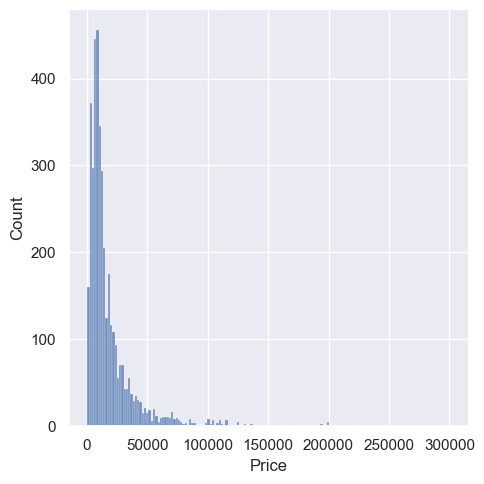

In [9]:
#plotting the price after dropping the rows
sn.displot(data['Price'])

In [10]:
#considering only the price below 99th percentile 
q= data['Price'].quantile(0.99)
data1 = data[data['Price']<q]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [11]:
# Here the maximum price has been changed to 129222, as we considered the price below 99th percentile only
# standard deviaition = 18976.268315
# mean = 17837.117460

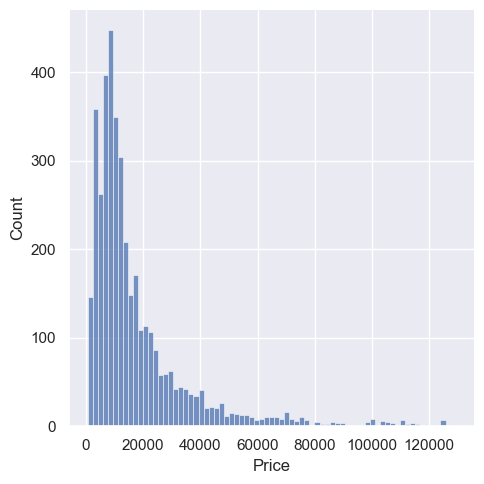

In [12]:
#plotting the price graph
sn.displot(data1['Price'])
plt.show()


In [13]:
# considering only the Mileage below 99th percentile 
q=data1['Mileage'].quantile(0.99)
data_2 = data1[data1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,185
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,NaN
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [14]:
# it returns the change in the max,mean and standard deviation of Mileaege from before

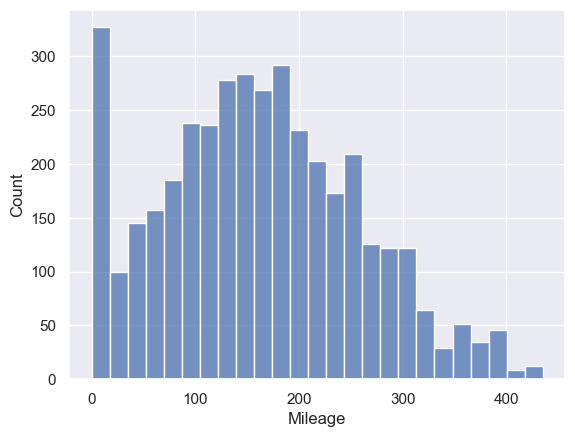

In [15]:
#plotting the Mileage in the graph
sn.histplot(data_2['Mileage'])
plt.show()

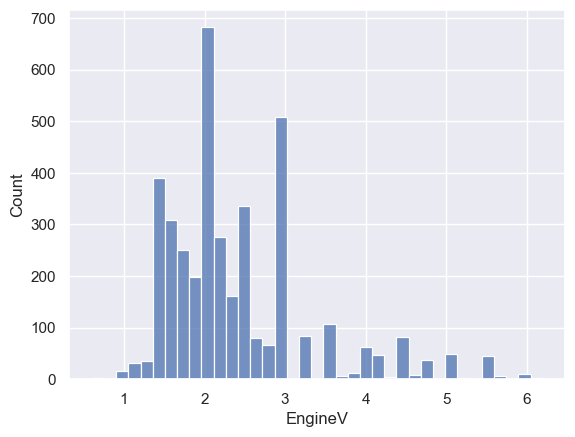

In [16]:
# considering the data of EngineVolume below 6.25 
data_3 = data_2[data_2['EngineV']<6.25]
sn.histplot(data_3['EngineV'])
plt.show()

In [17]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3908,3908.000000,3908,3908.000000,3908.000000,3908,3908,3908.000000,3908
unique,7,NaN,6,NaN,NaN,4,2,NaN,297
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,862,NaN,1491,NaN,NaN,1818,3546,NaN,185
mean,NaN,17884.442160,NaN,161.534289,2.430668,NaN,NaN,2006.396111,NaN
std,NaN,18960.072825,NaN,96.090871,0.921205,NaN,NaN,6.603449,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21050.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


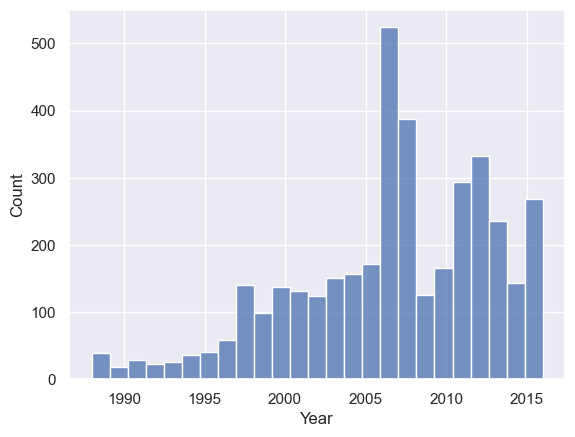

In [18]:
#consdiering the years above 1st percentile of year column
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sn.histplot(data_4['Year'])
plt.show()

In [19]:
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3854,3854.000000,3854,3854.000000,3854.000000,3854,3854,3854.000000,3854
unique,7,NaN,6,NaN,NaN,4,2,NaN,290
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1459,NaN,NaN,1807,3492,NaN,181
mean,NaN,18089.714611,NaN,160.798132,2.437455,NaN,NaN,2006.700830,NaN
std,NaN,19004.604811,NaN,95.656825,0.924213,NaN,NaN,6.110923,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000,NaN


## Data is preprocessed successfully


In [20]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3854,3854.000000,3854,3854.000000,3854.000000,3854,3854,3854.000000,3854
unique,7,NaN,6,NaN,NaN,4,2,NaN,290
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1459,NaN,NaN,1807,3492,NaN,181
mean,NaN,18089.714611,NaN,160.798132,2.437455,NaN,NaN,2006.700830,NaN
std,NaN,19004.604811,NaN,95.656825,0.924213,NaN,NaN,6.110923,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000,NaN


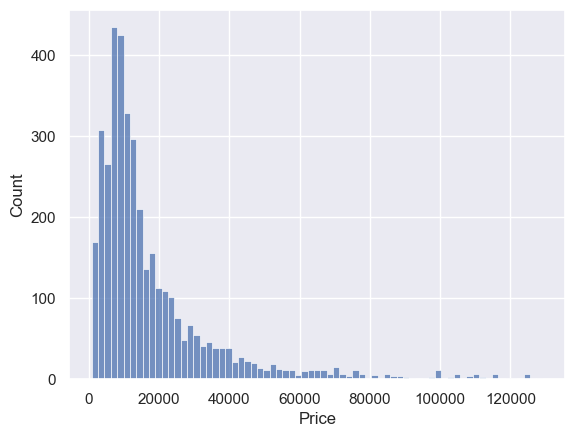

In [21]:
sn.histplot(data_cleaned['Price'])
plt.show()

In [22]:
#data_cleaned is saved as .csv file 
data_cleaned.to_csv('datacleaned.csv')